# SPSS ModelerのグラフノードをPythonで書き換える


■利用データ<BR>
各マシンコードごとに起動時間にそって電力や温度の変化、圧力スイッチ、そしてエラーがあればそれが時系列に記録されています。
    
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/223763/1e739d26-7c0f-3f6d-7c91-9934e64ba6c3.png)


In [1]:
!wget https://github.com/hkwd/200611Modeler2Python/raw/master/data/sampletranDEPT4en2019S.csv

'wget' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


In [2]:
#データの読み込み
import types
import pandas as pd

pd.options.display.max_rows = 10
#print(pd.options.display.max_rows)

import pandas as pd
df = pd.read_csv('Cond5n_e.csv')
print(df.dtypes)
df

M_CD        int64
UP_TIME     int64
POWER       int64
TEMP        int64
PRESSURE    int64
ERR_CD      int64
dtype: object


,M_CD,UP_TIME,POWER,TEMP,PRESSURE,ERR_CD
0,1000,0,948,250,0,0
1,1000,1,945,250,1,0
2,1000,2,944,250,1,0
3,1000,3,943,250,0,0
4,1000,4,940,250,1,0
...,...,...,...,...,...,...
5797,448,83,857,248,0,303
5798,448,84,851,248,0,303
5799,448,85,851,248,0,303
5800,448,86,846,248,1,303


In [3]:
#df['ERR_CD1'] = df[['ERR_CD']].apply(lambda x: x.astype('category'))
df['PRESSURE'] = df['PRESSURE'].astype('category')
df['ERR_CD'] = df['ERR_CD'].astype('category')
print(df.dtypes)

M_CD           int64
UP_TIME        int64
POWER          int64
TEMP           int64
PRESSURE    category
ERR_CD      category
dtype: object


In [4]:
df['ERR_CD'].cat.categories

Int64Index([0, 101, 202, 303], dtype='int64')

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# 棒グラフ

In [6]:
#棒グラフ
#df.groupby('ERR_CD').size()
#df.groupby('ERR_CD').size()
#df['ERR_CD'].value_counts()
#print(type(df.groupby('ERR_CD').size()))
#print(type(df['ERR_CD'].value_counts().sort_index()))
dfErrcdGrp=df.groupby('ERR_CD').size()
dfErrcdGrp


ERR_CD
0      4589
101     531
202     549
303     133
dtype: int64

<BarContainer object of 4 artists>

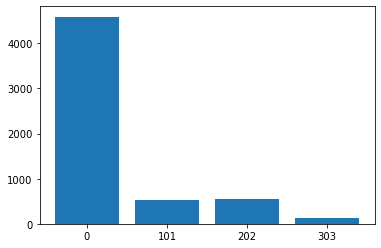

In [7]:
plt.bar(dfErrcdGrp.index.astype('str'), dfErrcdGrp)

https://pythondatascience.plavox.info/matplotlib/%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95

<AxesSubplot:xlabel='ERR_CD'>

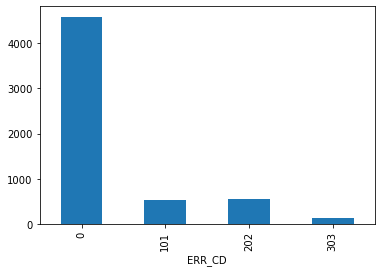

In [8]:
#棒グラフpandasのplot
dfErrcdGrp.plot.bar()

In [9]:
#積み上げ棒グラフ pandasのplot
dfcross=pd.crosstab(df['ERR_CD'],df['PRESSURE'])
dfcross=dfcross.reindex(['1','0'],axis="columns")
dfcross

PRESSURE,1,0
ERR_CD,,
0,2254,2335
101,193,338
202,251,298
303,27,106


<AxesSubplot:xlabel='ERR_CD'>

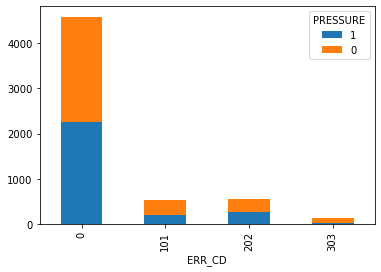

In [10]:
dfcross.plot.bar(stacked=True)

In [11]:
#100%積み上げ棒グラフ pandasのplot
dfcross=pd.crosstab(df['ERR_CD'],df['PRESSURE'], normalize='index')
dfcross=dfcross.reindex(['1','0'],axis="columns")
dfcross


PRESSURE,1,0
ERR_CD,,
0,0.491175,0.508825
101,0.363465,0.636535
202,0.457195,0.542805
303,0.203008,0.796992


<AxesSubplot:xlabel='ERR_CD'>

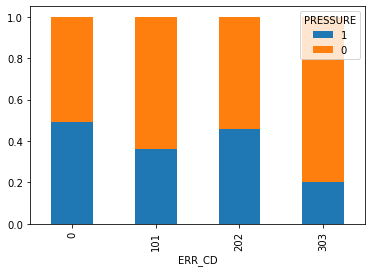

In [12]:
dfcross.plot.bar(stacked=True)

https://loveshome.hatenablog.jp/entry/2018/12/05/232902

# 散布図

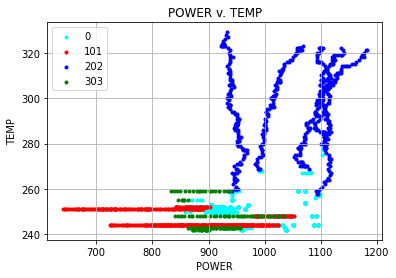

In [13]:
#散布図
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colors=['cyan','red','blue','green']
for i,err_cd in enumerate(df['ERR_CD'].cat.categories):
    dfErrTmp=df.query('ERR_CD=={0}'.format(err_cd))[['POWER','TEMP']]
    ax.scatter(dfErrTmp['POWER'],dfErrTmp['TEMP'], c=colors[i], marker='.', label=str(err_cd))

ax.set_title('POWER v. TEMP')
ax.set_xlabel('POWER')
ax.set_ylabel('TEMP')
ax.grid(True)
ax.legend(loc='upper left')

plt.show()

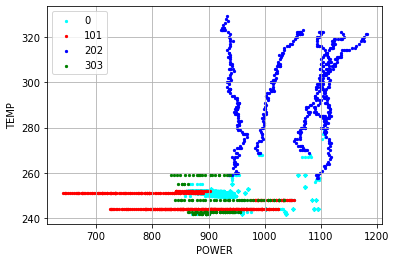

In [14]:
#散布図pandasのplot
#df[['POWER','TEMP']].plot.scatter(x='POWER',y='TEMP')
ax=None
for i,err_cd in enumerate(df['ERR_CD'].cat.categories):
    dfErrTmp=df.query('ERR_CD=={0}'.format(err_cd))[['POWER','TEMP']]
    ax=dfErrTmp.plot.scatter(x='POWER',y='TEMP', c=colors[i], marker='.'
                             ,grid=True, label=str(err_cd),ax=ax)



# ヒストグラム

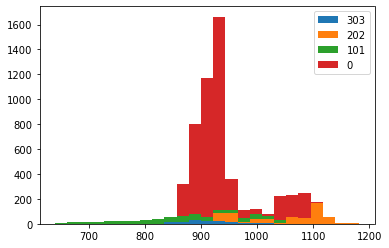

In [15]:
#ヒストグラム
powers=[]
errs=df['ERR_CD'].cat.categories.sort_values (ascending=False)
for i,err_cd in enumerate(errs):
    powers.append(df.query('ERR_CD=={0}'.format(err_cd))['POWER'])
plt.hist(powers,bins=25, stacked=True,label=errs.astype('str'))
plt.legend()

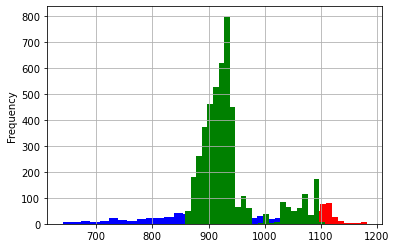

In [16]:
#ヒストグラム pandas plotをつかって積み上げようとしたがbottomの指定方法を思いつけなかった
errs=df['ERR_CD'].cat.categories.sort_values (ascending=False)
ax=None
for i,err_cd in enumerate(errs):
    ax=df.query('ERR_CD=={0}'.format(err_cd))['POWER'].plot.hist(x='POWER',bins=25, stacked=True,
                                                           color=colors[i], grid=True, label=str(err_cd),ax=ax)
#    powers.append(df.query('ERR_CD=={0}'.format(err_cd))['POWER'])
#plt.hist(powers,bins=25, stacked=True,label=errs.astype('str'))
#for i,err_cd in enumerate(df['ERR_CD'].cat.categories):


https://pythondatascience.plavox.info/matplotlib/%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0

# 折れ線グラフ

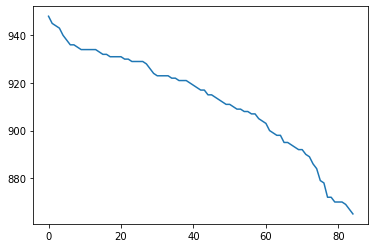

In [17]:
#折れ線グラフ
df1000=df.query('M_CD==1000')
plt.plot(df1000['UP_TIME'],df1000['POWER'])

<AxesSubplot:xlabel='UP_TIME'>

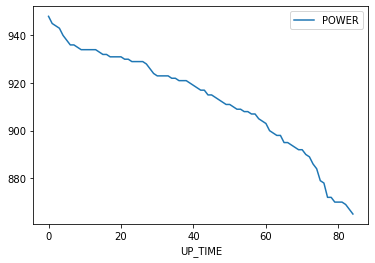

In [18]:
df1000.plot(x='UP_TIME', y='POWER')

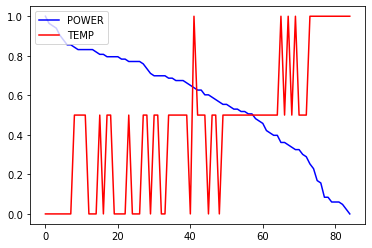

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

from sklearn import preprocessing
mm = preprocessing.MinMaxScaler()
#mmPower=mm.fit_transform(df1000[['POWER']])
ax.plot(df1000['UP_TIME'],mm.fit_transform(df1000[['POWER']]), c="blue", label='POWER')
ax.plot(df1000['UP_TIME'],mm.fit_transform(df1000[['TEMP']]), c="red", label='TEMP')
ax.legend(loc='upper left')
plt.show()

In [20]:
print(mm.fit_transform(df1000[['POWER']]).shape)
print(mm.fit_transform(df1000[['POWER']])[:,0].shape)

(85, 1)
(85,)


<AxesSubplot:xlabel='UP_TIME'>

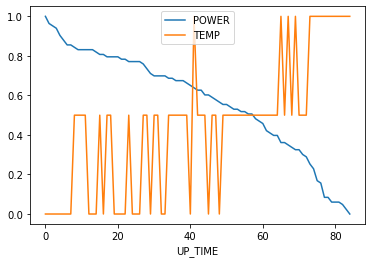

In [21]:
df1000norm=pd.DataFrame({'UP_TIME':df1000['UP_TIME'],
             'POWER':mm.fit_transform(df1000[['POWER']])[:,0],
             'TEMP':mm.fit_transform(df1000[['TEMP']])[:,0]})
df1000norm.plot(x='UP_TIME')

https://note.nkmk.me/python-pandas-plot/
https://www.python.ambitious-engineer.com/archives/908
https://note.nkmk.me/python-list-ndarray-dataframe-normalize-standardize/

# 円グラフ

In [22]:
#円グラフ
dfErrcdGrp=df.groupby('ERR_CD').size()
dfErrcdGrp

ERR_CD
0      4589
101     531
202     549
303     133
dtype: int64

([<matplotlib.patches.Wedge at 0x2a3fcf4e250>,
 [Text(0.6716441008163857, -0.8711453391016616, '0'),
  Text(-0.9408019879753596, 0.569992648568042, '101'),
  Text(-0.46982267186665266, 0.9946188501129866, '202'),
  Text(-0.0791482751820494, 1.0971488278878607, '303')])

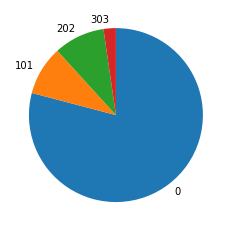

In [23]:
#plt.pie(df['ERR_CD'].value_counts().sort_index(), labels=df['ERR_CD'].cat.categories.astype('str'), counterclock=False, startangle=90)
plt.pie(dfErrcdGrp, labels=dfErrcdGrp.index.astype('str'), counterclock=False, startangle=90)

https://note.nkmk.me/python-pandas-sort-values-sort-index/

<AxesSubplot:ylabel='None'>

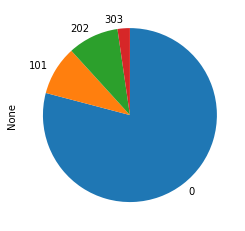

In [24]:
#円グラフ
#開始角度を 90 度, 時計回りに設定
#df['ERR_CD'].value_counts()
#df['ERR_CD'].value_counts().sort_index()
dfErrcdGrp.plot.pie(counterclock=False, startangle=90)

# ヒートマップ


In [25]:
#ヒートマップ
dfcross=pd.crosstab(df['ERR_CD'],df['PRESSURE'])
dfcross

PRESSURE,0,1
ERR_CD,,
0,2335,2254
101,338,193
202,298,251
303,106,27


<AxesSubplot:xlabel='PRESSURE', ylabel='ERR_CD'>

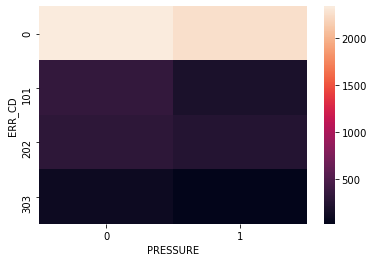

In [26]:
import seaborn as sns
sns.heatmap(dfcross)

https://note.nkmk.me/python-seaborn-heatmap/

In [27]:
import sys

print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [28]:
print(pd.__version__)

1.0.5
